In [42]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Dataset.csv")

# LEVEL 1

## Data Exploration and Preprocessing

In [3]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
df.shape

(9551, 21)

## Descriptive Analysis

In [8]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [9]:
df['Cuisines'].value_counts().unique()

array([936, 511, 354, 334, 299, 218, 197, 170, 149, 131, 118, 116, 112,
       108, 105, 103,  83,  74,  71,  70,  68,  65,  63,  62,  60,  56,
        54,  53,  51,  49,  46,  44,  43,  42,  41,  36,  35,  34,  31,
        28,  26,  24,  22,  21,  20,  19,  18,  17,  16,  15,  14,  13,
        12,  11,  10,   9,   8,   7,   6,   5,   4,   3,   2,   1],
      dtype=int64)

In [10]:
df['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [11]:
df.Cuisines.unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [12]:
cnt=0
visited=[]
for i in range(0,len(df['Cuisines'])):
    if df['Cuisines'][i] not in visited:
        visited.append(df['Cuisines'][i])
        cnt+=1
print("No.of.unique values :",
      cnt)
 
print("unique values :",
      visited)       

No.of.unique values : 1826
unique values : ['French, Japanese, Desserts', 'Japanese', 'Seafood, Asian, Filipino, Indian', 'Japanese, Sushi', 'Japanese, Korean', 'Chinese', 'Asian, European', 'Seafood, Filipino, Asian, European', 'European, Asian, Indian', 'Filipino', 'Filipino, Mexican', 'American, Ice Cream, Desserts', 'Korean', 'Cafe, American, Italian, Filipino', 'Italian, Pizza', 'Cafe, Korean, Desserts', 'Cafe, Bakery, American, Italian', 'Seafood, American, Mediterranean, Japanese', 'American, Asian, Italian, Seafood', 'Fast Food, French', 'Cafe', 'Bakery', 'Brazilian', 'Pizza', 'Arabian', 'Brazilian, Cafe', 'Italian', 'Bar Food, Brazilian', 'Mexican, Grill', 'International', 'Peruvian, Latin American', 'American, Grill', 'Seafood', 'American, Burger', 'Seafood, Bar Food, Brazilian', 'Desserts, Cafe', 'Juices, Healthy Food', 'Beverages, Bar Food, Fast Food', 'Lebanese', 'Burger', 'Brazilian, Bar Food', 'Brazilian, Healthy Food, Juices, Pizza', 'Bakery, Sandwich, Brazilian', 'Braz

In [13]:
df.City.unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Bras�_lia', 'Rio de Janeiro', 'S��o Paulo',
       'Albany', 'Armidale', 'Athens', 'Augusta', 'Balingup',
       'Beechworth', 'Boise', 'Cedar Rapids/Iowa City', 'Chatham-Kent',
       'Clatskanie', 'Cochrane', 'Columbus', 'Consort', 'Dalton',
       'Davenport', 'Des Moines', 'Dicky Beach', 'Dubuque',
       'East Ballina', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lakeview', 'Lincoln', 'Lorn', 'Macedon', 'Macon', 'Mayfield',
       'Mc Millan', 'Middleton Beach', 'Miller', 'Monroe', 'Montville',
       'Ojo Caliente', 'Orlando', 'Palm Cove', 'Paynesville', 'Penola',
       'Pensacola', 'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentha

In [14]:
df.City.value_counts().unique()

array([5473, 1118, 1080,  251,   25,   21,   20,   18,   16,   14,   11,
          6,    4,    3,    2,    1], dtype=int64)

In [15]:
cnt=0
visited=[]
for i in range(0,len(df['City'])):
    if df['City'][i] not in visited:
        visited.append(df['City'][i])
        cnt+=1
print("No.of.unique values :",
      cnt)
 
print("unique values :",
      visited)       

No.of.unique values : 141
unique values : ['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City', 'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City', 'Taguig City', 'Bras�_lia', 'Rio de Janeiro', 'S��o Paulo', 'Albany', 'Armidale', 'Athens', 'Augusta', 'Balingup', 'Beechworth', 'Boise', 'Cedar Rapids/Iowa City', 'Chatham-Kent', 'Clatskanie', 'Cochrane', 'Columbus', 'Consort', 'Dalton', 'Davenport', 'Des Moines', 'Dicky Beach', 'Dubuque', 'East Ballina', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville', 'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance', 'Lakeview', 'Lincoln', 'Lorn', 'Macedon', 'Macon', 'Mayfield', 'Mc Millan', 'Middleton Beach', 'Miller', 'Monroe', 'Montville', 'Ojo Caliente', 'Orlando', 'Palm Cove', 'Paynesville', 'Penola', 'Pensacola', 'Phillip Island', 'Pocatello', 'Potrero', 'Princeton', 'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City', 'Tampa Bay', 'Tanunda', 'Trentham East', 'Valdosta', 'Vernonia', 'Victor Harbor', 'Vineland St

In [16]:
a=df['City'].mode()
print(a)

0    New Delhi
Name: City, dtype: object


In [17]:
df[df['City'] == 'New Delhi'].count()[0]

5473

In [18]:
df[df['City'] == 'Nagpur'].count()[0]

20

In [19]:
dist = df['Aggregate rating'].value_counts()
print(dist)

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64


In [20]:
print(df['City'].value_counts())

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64


In [21]:
Cuisines_dist=df['Cuisines'].value_counts()
print(Cuisines_dist)

North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64


In [22]:
Top_cuisines= Cuisines_dist.head(5)
print(Top_cuisines)

North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: Cuisines, dtype: int64


##  Geospatial Analysis

In [23]:
pip install folium 

In [28]:
df[['Longitude', 'Latitude']]

,Longitude,Latitude
0,121.027535,14.565443
1,121.014101,14.553708
2,121.056831,14.581404
3,121.056475,14.585318
4,121.057508,14.584450
...,...,...
9546,28.977392,41.022793
9547,29.041297,41.009847
9548,29.034640,41.055817
9549,29.036019,41.057979


In [36]:
import folium
from branca.element import Figure
fig=Figure(width=550,height=350)
fig3=Figure(width=550,height=350)
m3=folium.Map(location=[28.644800, 77.216721],tiles='cartodbpositron',zoom_start=11)
fig3.add_child(m3)
folium.Marker(location=[28.695800, 77.244721],popup='Default popup Marker1',tooltip='Click here to see Popup').add_to(m3)
m3

[]

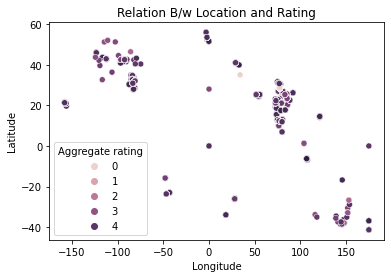

In [44]:
sn.scatterplot(x='Longitude',y='Latitude',hue='Aggregate rating' , data=df)
plt.title('Relation B/w Location and Rating')
plt.plot()

# LEVEL 2

## Table Booking and Online Delivery

In [46]:
Table_booking_percentage=(df['Has Table booking'].value_counts(normalize=True)*100)
print('percentage of restaurants offering table booking:')
print(Table_booking_percentage)

percentage of restaurants offering table booking:
No     87.875615
Yes    12.124385
Name: Has Table booking, dtype: float64


In [49]:
online_delivery_percentage=(df['Has Online delivery'].value_counts(normalize=True)*100)
print('Percentage of restaurants offring online delivery')
print(online_delivery_percentage)

Percentage of restaurants offring online delivery
No     74.337766
Yes    25.662234
Name: Has Online delivery, dtype: float64


In [50]:
avg_rating_restraunts_table_book=df.groupby('Has Table booking')['Aggregate rating'].mean()
print('Average Rating')
print(avg_rating_restraunts_table_book)

Average Rating
Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


In [52]:
prg = df.groupby('Price range')
online_delivery_by_price_range=(prg['Has Online delivery'].value_counts(normalize=True)*100).unstack()
print('percentage of restraunts offring online delivery')
print(online_delivery_by_price_range)

percentage of restraunts offring online delivery
Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


In [53]:
# t2

p_r = df['Price range'].value_counts()
common_p_r=p_r.idxmax()
print('Most common Price Range: ')
print(common_p_r)

Most common Price Range: 
1


In [54]:
avg_rating_by_p_r= df.groupby('Price range')['Aggregate rating'].mean()
print('Avg rating for price range')
print(avg_rating_by_p_r)

Avg rating for price range
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


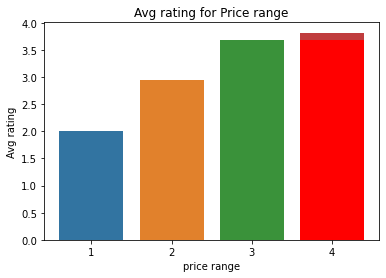

In [61]:

h_r_p=avg_rating_by_p_r.idxmax()

sn.barplot(x=avg_rating_by_p_r.index,y=avg_rating_by_p_r.values)
plt.xlabel('price range')
plt.ylabel('Avg rating')
plt.title('Avg rating for Price range')

h_r_p=avg_rating_by_p_r.index.get_loc(h_r_p)
plt.bar(h_r_p,avg_rating_by_p_r[h_r_p],color='red')
plt.show()

In [62]:
# t3 

df['Name Length'] = df['Restaurant Name'].apply(len)
df['Address Length'] = df['Address'].apply(len)
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [64]:
D = pd.get_dummies(df,columns=['Has Table booking' , 'Has Online delivery'])
D.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Aggregate rating,Rating color,Rating text,Votes,Name Length,Address Length,Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,4.8,Dark Green,Excellent,314,16,71,0,1,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,4.5,Dark Green,Excellent,591,16,67,0,1,1,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,4.4,Green,Very Good,270,22,56,0,1,1,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,4.9,Dark Green,Excellent,365,4,70,1,0,1,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,4.8,Dark Green,Excellent,229,11,64,0,1,1,0
